In [1]:
import numpy as np 
import networkx as nx 

### Implement Random Walk on mock graph

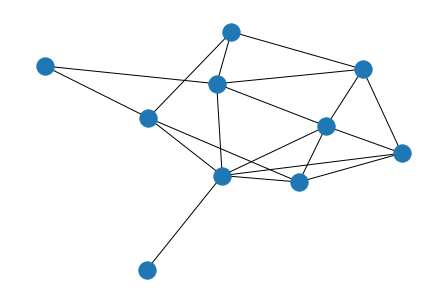

In [10]:
# generate a random graph 
graph = nx.fast_gnp_random_graph(n=10, p=0.5)
nx.draw(graph)

In [11]:
# save this random graph for later use 
nx.write_edgelist(graph, path="./cache/random_graph_n=10_p-0.5.edgelist")

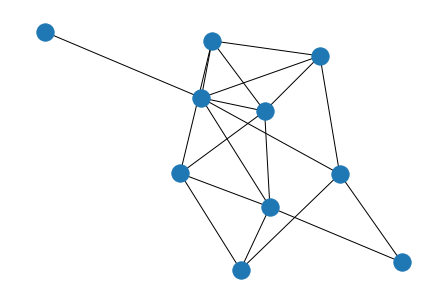

In [13]:
# read from save edgelist of graph 
graph = nx.read_edgelist(path="./cache/random_graph_n=10_p-0.5.edgelist")
nx.draw(graph, label=True)

The shape is different, but the connection remain the same. 

#### General Ideas about Random Walk 
1. Random Walk represents the progression of the state of the graph as time (t) changes from 0 to T. 

2. The state of the graph at each time frame can be represented by $p_t(a)$, where $p_t$ is the probability distribution at time t, and $a$ is the probability of the walker being at vertex $a$ at time $t$. 

3. The probability of the walker being at vertex $a$ at time $t+1$ is the sum of the product of: 
    - the probability of the walker being at the neighboring node $b$ at time $t$ 
        > $p_t(b)$
    - the probability of the walker moves from $b$ to $a$ at time $t+1$ 
        > $\frac{w(a,b)}{d(b)}$ where $d(b) = \sum_{a} w(a,b)$, i.e. the total weighted degree of vertex $b$. 
        
    - In general, this can be expressed as: 
    $$
        p_{t+1}(a) = \sum_{b:(a,b) \in E} \frac{w(a,b)}{d(b)} p_t(b)
    $$

4. Let's focus on the case of an undirected unweighted graph. In this case, there are two special conditions: 

    1. All neighbors of vertex $a$ are equally likely to be selected. 
    2. The walker can choose to remain at the same vertex. (Lazy Walk) 
    
    <br>

    - Lazy walk's probability distribution across vertices will look like this: 
    $$
         p_{t+1}(a) = \frac{1}{2}p_t(a) + \frac{1}{2}\sum_{b:(a,b) \in E} \frac{w(a,b)}{d(b)} p_t(b)
    $$

5. The Matrix Form of the Lazy Walk equation is: $$p_{t+1}=\frac{1}{2} (\textbf{I} + \textbf{M}\textbf{D}^{-1})p_t$$ Where $\textbf{D}$ is the degree matrix and $\textbf{M}$ adjacency matrix. 



#### Implementing the non-lazy random walk on a weighted graph

In [28]:
import random 

# assign some weights to the graph for testing
for (u,v,w) in graph.edges(data=True):
    w['weight'] = random.randint(0,10)

In [186]:
# implement choosing neighbor node utility function 

def choose_neighbor(graph, node): 
    """given a graph and a node in that graph, randomly select a neighboring node and return it"""
    if type(node) != str: 
        node = str(node) # type conversion 

    neighbors = list(nx.neighbors(graph, node)) # get all the neighbors 
    # if there is no neighbors, we have reached the end, return None as output
    if len(neighbors) == 0: 
        return None
    weights_of_neighbors = {f"('{node}', '{n}')": graph.get_edge_data(node, n)['weight'] for n in nx.neighbors(graph, node)}# get the weight of the edges between neighbors and the node

    # sample an edge based on their weight 
    edges = np.fromiter(weights_of_neighbors.keys(), np.dtype((str, 32)))
    values = np.fromiter(weights_of_neighbors.values(), np.dtype((int)))
    target_edge = np.random.choice(edges, p=values/np.sum(values))
    return eval(target_edge)[1]


choose_neighbor(graph, 1)

'7'

In [188]:
def random_walk(graph, initial_node, k): 
    """given a graph and a initial_node, perform random walk for k number of steps"""
    if type(initial_node) != str: 
        initial_node = str(initial_node) # type conversion 
    steps = 0
    walk_path = np.array([initial_node])
    cur_node = initial_node
    print("Start Walking.")
    while steps < k: 
        next_node = choose_neighbor(graph, cur_node)
        if next_node is None: 
            print("Reached the end of the graph!")
            break
        walk_path = np.append(walk_path, next_node) 
        cur_node = next_node
        steps+=1 
    print("Stopped Waling.")

    print(f"The random walk of {k} steps followed this path: ", path)
    return walk_path

path = random_walk(graph, '0', k=10)

Start Walking.
Stopped Waling.
The random walk of 10 steps followed this path:  ['0' '6' '7' '6' '7' '6' '7' '6' '7' '8' '9']


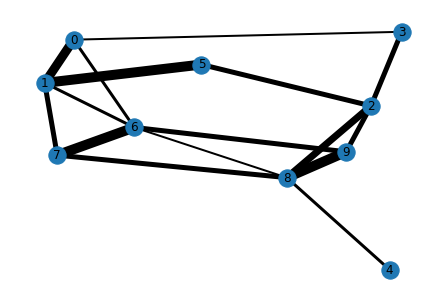

In [197]:
# plot
weights = [graph.get_edge_data(*edge)['weight'] for edge in graph.edges]
nx.draw(graph, with_labels=True, width=weights)